# Mobile Price Prediction

## Data Cleaning

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train  = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [5]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [7]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [10]:
test.drop('id',axis=1,inplace=True)

D:\Software_Installation\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

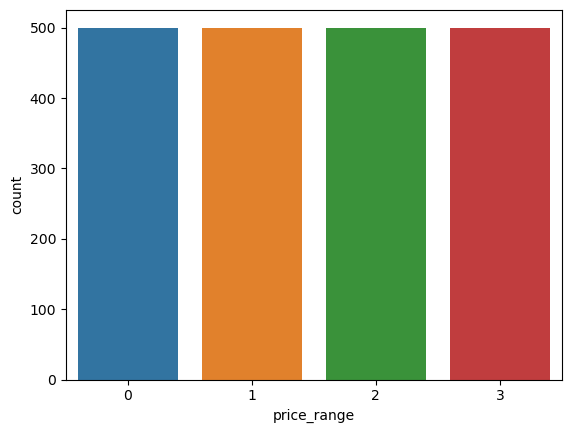

In [12]:
sns.countplot(train["price_range"])

In [13]:
train.shape

(2000, 21)

In [14]:
test.shape

(1000, 20)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [19]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


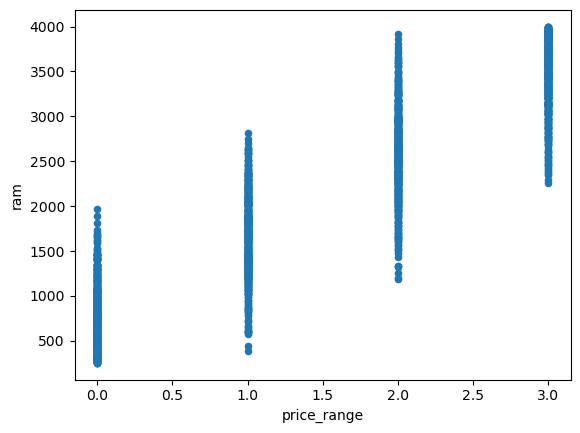

In [20]:
train.plot(x='price_range',y='ram',kind='scatter')
plt.show()

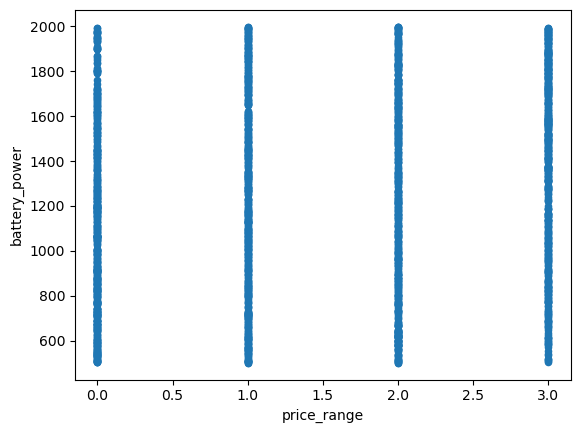

In [21]:
train.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

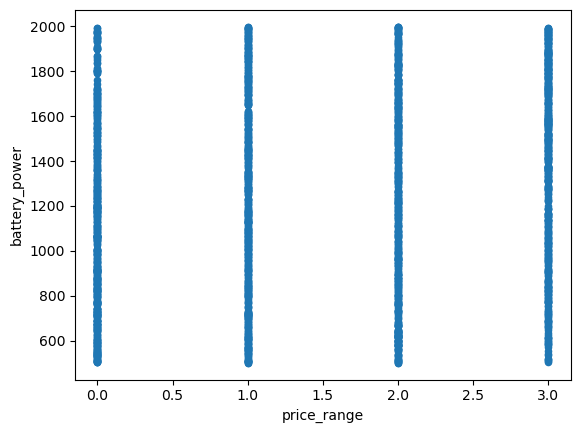

In [22]:
train.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

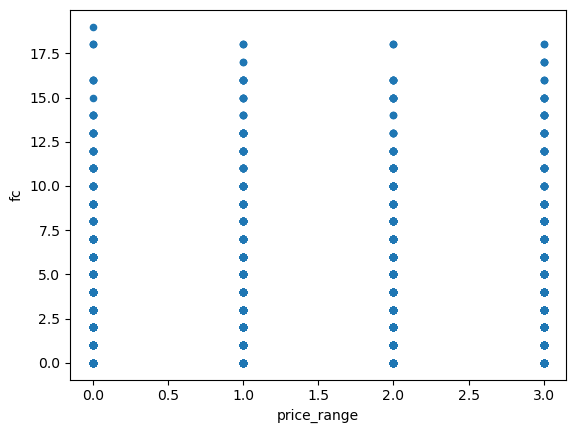

In [23]:
train.plot(x='price_range',y='fc',kind='scatter')
plt.show()

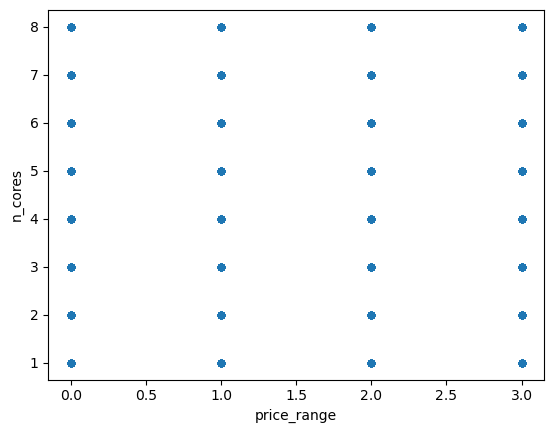

In [24]:
train.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

In [25]:
train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


## Freatures Engineering

<AxesSubplot:>

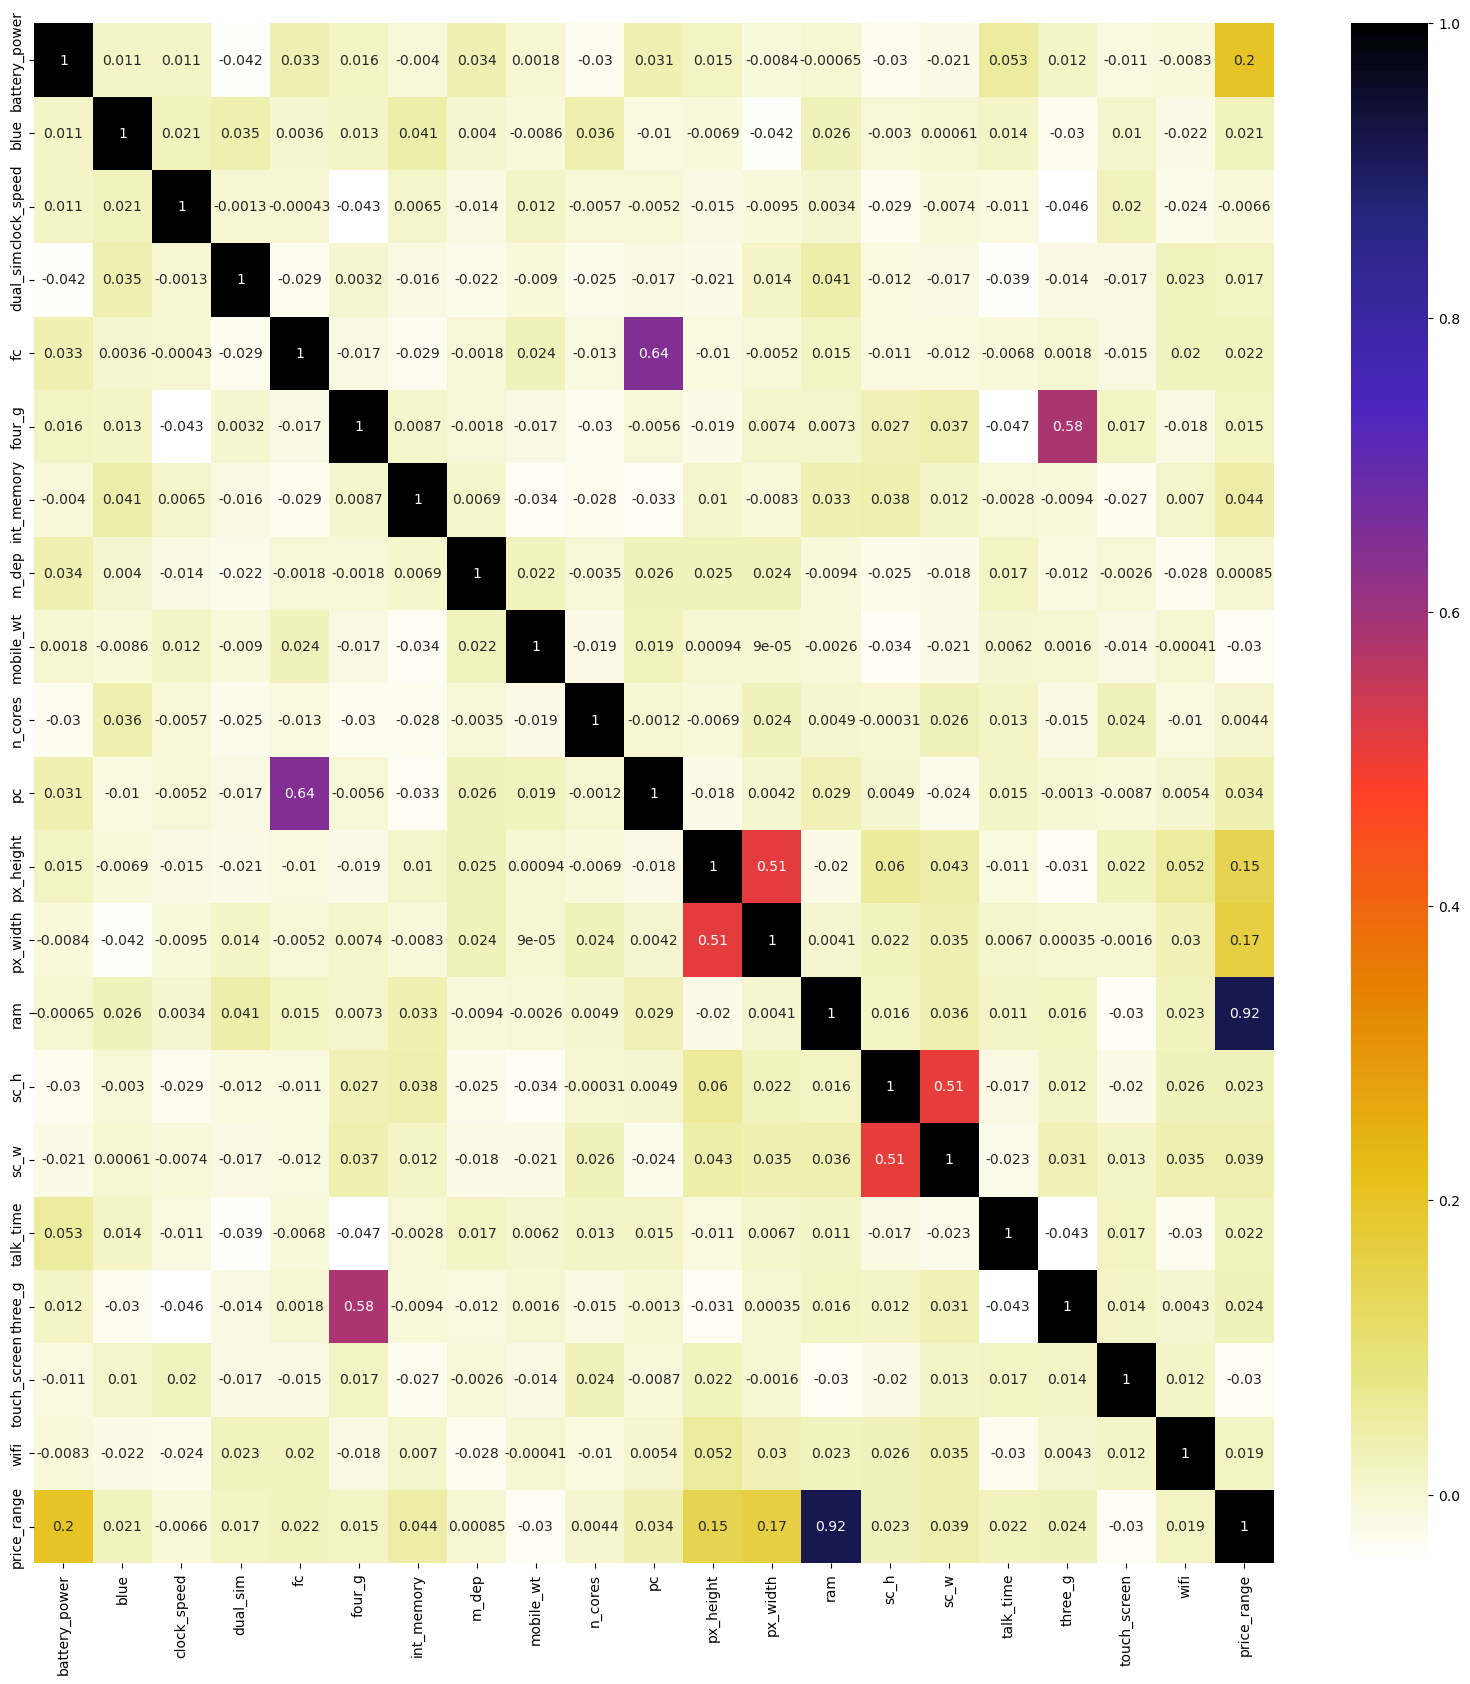

In [27]:
import seaborn as sns
from matplotlib.pyplot import figure
#Using Pearson Correlation
fig = plt.figure(figsize=(20, 20))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [28]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(train, 0.8)
len(set(corr_features))

1

In [31]:
corr_features

{'price_range'}

<AxesSubplot:>

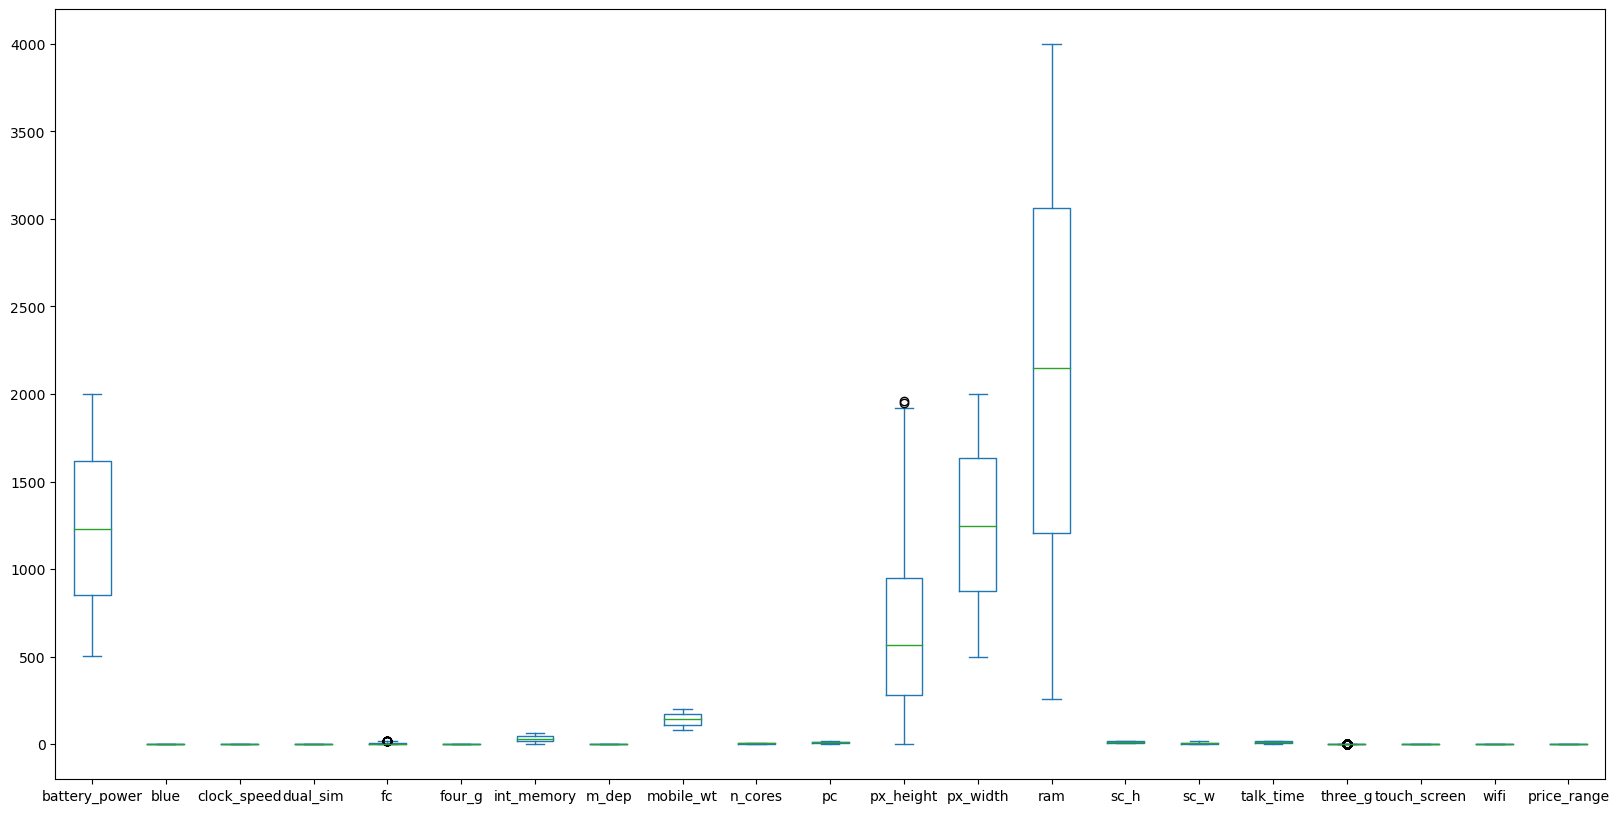

In [33]:
train.plot(kind='box',figsize=(20,10))

In [34]:
X = train.drop('price_range',axis=1)
y = train['price_range']

## Trainning DataSet

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test = sc.transform(test)

In [38]:
X_train

array([[-1.62737257, -0.98675438, -1.01271559, ..., -1.78222729,
        -1.00892875, -0.99888951],
       [-0.75199354,  1.01342342,  0.58093235, ..., -1.78222729,
         0.99115027, -0.99888951],
       [-0.20630271,  1.01342342,  0.70352065, ...,  0.56109566,
        -1.00892875,  1.00111173],
       ...,
       [ 0.69636086,  1.01342342, -0.03200917, ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 0.83733099, -0.98675438, -1.2578922 , ...,  0.56109566,
        -1.00892875,  1.00111173],
       [ 0.4144206 , -0.98675438, -0.39977408, ...,  0.56109566,
         0.99115027,  1.00111173]])

In [40]:
X_test

array([[ 0.28481903, -0.98675438, -1.2578922 , ...,  0.56109566,
        -1.00892875, -0.99888951],
       [-1.44092821, -0.98675438, -1.2578922 , ...,  0.56109566,
         0.99115027,  1.00111173],
       [-1.49322358, -0.98675438, -0.15459747, ...,  0.56109566,
        -1.00892875,  1.00111173],
       ...,
       [-0.55418061,  1.01342342,  0.33575574, ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 0.09610095, -0.98675438, -0.89012729, ...,  0.56109566,
         0.99115027,  1.00111173],
       [-1.60690917, -0.98675438,  1.07128556, ...,  0.56109566,
         0.99115027, -0.99888951]])

In [42]:
test

array([[-0.4541373 ,  1.01342342,  0.33575574, ..., -1.78222729,
         0.99115027, -0.99888951],
       [-0.91342707,  1.01342342, -1.2578922 , ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 1.2829785 ,  1.01342342,  1.56163877, ..., -1.78222729,
         0.99115027,  1.00111173],
       ...,
       [-0.13127022, -0.98675438, -0.15459747, ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 0.65998148,  1.01342342, -1.2578922 , ..., -1.78222729,
         0.99115027, -0.99888951],
       [ 0.06199528,  1.01342342, -1.2578922 , ...,  0.56109566,
        -1.00892875,  1.00111173]])

## Decision Tree Classification

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train , Y_train)

DecisionTreeClassifier()

In [44]:
pred = dtc.predict(X_test)
pred

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 3, 1,
       2, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 3, 3, 2, 2, 3, 1, 3, 2,
       0, 1, 0, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 2, 0, 3, 3, 1, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       1, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 1, 0, 0, 1, 3, 2, 0, 2, 1, 3, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       1, 2, 3, 1, 2, 1, 0, 1, 3, 2, 1, 2, 1, 3, 1, 0, 2, 2, 0, 3, 0, 0,
       3, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
dtc_acc = accuracy_score(pred,Y_test)
print(dtc_acc)
print(confusion_matrix(pred,Y_test))

0.855
[[43  3  0  0]
 [ 7 39  7  0]
 [ 0  4 49  2]
 [ 0  0  6 40]]


## SVC Classification

In [46]:
from sklearn.svm import SVC
knn=SVC()
knn.fit(X_train,Y_train)

SVC()

In [47]:
pred1 = knn.predict(X_test)
pred1

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 3, 2,
       3, 0, 2, 3, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 3, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 1, 1, 1, 3, 1, 0, 3, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 3, 2, 0, 2, 0, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 1, 2, 1, 2, 1, 0, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(pred1,Y_test)
print(svc_acc)
print(confusion_matrix(pred1,Y_test))

0.88
[[46  3  0  0]
 [ 4 40  8  0]
 [ 0  3 52  4]
 [ 0  0  2 38]]


## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression  # its a classification
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [51]:
pred2 = lr.predict(X_test)
pred2

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 3, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 3, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(pred2,Y_test)
print(lr_acc)
print(confusion_matrix(pred2,Y_test))


0.955
[[49  1  0  0]
 [ 1 45  3  0]
 [ 0  0 56  1]
 [ 0  0  3 41]]


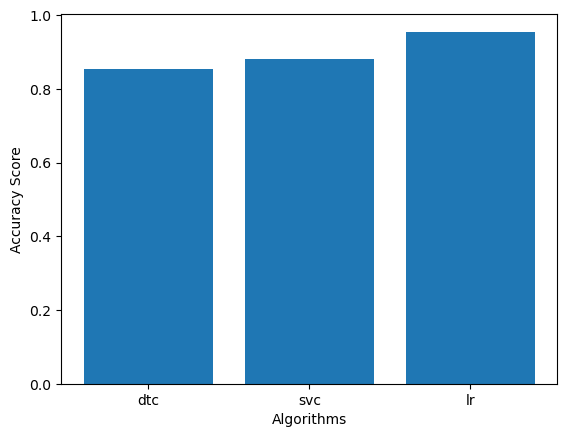

In [53]:
plt.bar(x=['dtc','svc','lr'],height=[dtc_acc,svc_acc,lr_acc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

In [54]:
lr.predict(test)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
regressor = RandomForestRegressor(n_estimators=100,criterion='squared_error')
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [61]:
regressor.score(X_test, Y_test)

0.9357660738714091

In [62]:
regressor = RandomForestRegressor(n_estimators=750,criterion='squared_error')
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)

0.9361161650706794

In [68]:
y_pred = regressor.predict(X_test)
y_pred

array([9.76000000e-01, 1.00533333e+00, 2.00133333e+00, 9.62666667e-01,
       1.97333333e-01, 1.18133333e+00, 2.00666667e+00, 8.50666667e-01,
       9.57333333e-01, 8.93333333e-01, 0.00000000e+00, 7.65333333e-01,
       1.09866667e+00, 9.53333333e-01, 1.06400000e+00, 7.73333333e-02,
       8.14666667e-01, 1.63733333e+00, 7.70666667e-01, 3.32000000e-01,
       2.99866667e+00, 5.20000000e-01, 2.20266667e+00, 2.96266667e+00,
       2.02800000e+00, 1.98666667e+00, 2.08666667e+00, 1.16666667e+00,
       0.00000000e+00, 2.80000000e-02, 1.91466667e+00, 2.96666667e+00,
       8.00000000e-03, 8.00000000e-03, 2.98400000e+00, 9.33333333e-03,
       8.00000000e-03, 1.33333333e-03, 1.02800000e+00, 1.29333333e+00,
       8.05333333e-01, 2.18533333e+00, 2.73600000e+00, 2.17600000e+00,
       2.82000000e+00, 7.20000000e-01, 1.20000000e+00, 2.95600000e+00,
       2.97200000e+00, 1.13200000e+00, 5.33333333e-03, 5.40000000e-01,
       2.13200000e+00, 2.72266667e+00, 2.95066667e+00, 2.16666667e+00,
      

In [70]:
Y_test

1458    1
198     1
1276    2
1243    1
1267    1
       ..
773     2
756     0
1166    0
1734    3
138     0
Name: price_range, Length: 200, dtype: int64

In [71]:
Y_test.iloc[-1]

0

# Confusion Matrix

In [74]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

In [75]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

## KNN Classification

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [77]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)

D:\Software_Installation\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Classifier Accuracy Score:  0.9325
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       109
           1       0.91      0.94      0.93        89
           2       0.90      0.91      0.90       106
           3       0.94      0.92      0.93        96

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



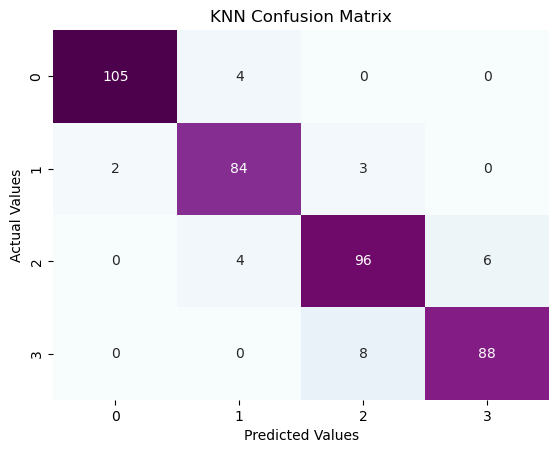

In [78]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

## SVM Classifier

In [79]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

In [80]:
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

SVM Classifier Accuracy Score:  0.955
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       109
           1       0.90      0.99      0.94        89
           2       0.97      0.90      0.93       106
           3       0.96      0.97      0.96        96

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



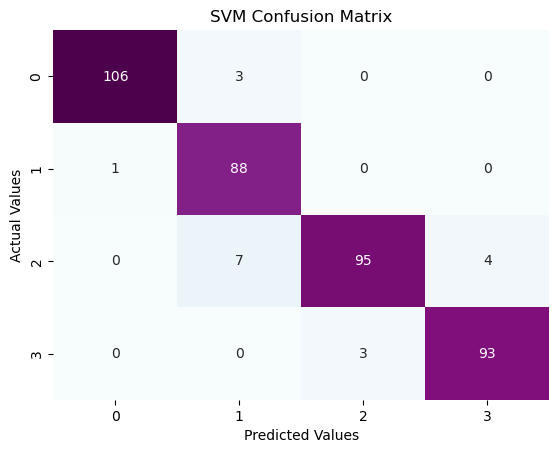

In [81]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

## ----------------------------------------------------------------------------------------------------------------

## Logistic Regression Score : 95%

## Random Forest Regression Score : 93%

## KNN Classification Score : 93%

## SVM Classifier Score : 95% 

## Decision Tree Classification Score : 85%

## ----------------------------------------------------------------------------------------------------------------